# Player Analysis for BPL 10

Author: Cearlmau

This file breaks down the player distribution of BPL teams based on team and level
at various points in the BPL 10 event. The goal of this data analysis is to look at
whether or not the team distributions had an effect on overall team player levels, and
how that may contribute to a team's success.

Special thanks to Moowiz for providing the data.

In [36]:
#Libraries and Data Sources
import csv
import pandas as pd
import plotly
import datetime
import matplotlib
import matplotlib.pyplot as plt

level_data = pd.read_csv("../../data/bpl-10_level_data.csv")
teams_data = pd.read_csv("../../data/bpl-10_teams.csv")

## Background:

Path of Exile is an action RPG game whose premise revolves around the player killing enemies using a preset character with an extensive amount of customization. The killed enemies generate loot and other bonuses which the player can use to augment and upgrade their character. Path of Exile is an online game, which means that players can interact with one another, trading each items and/or playing in the same instance as one another.

BPL is a quarterly community event that coincides with each major update that Path of Exile receives. Around 2000 players is placed inside an isolated and newly created instance (referred to as a "league") where they must work together with their designated team to acquire items and accomplish objectives("bounties") defined by the organizers. Doing so accumulates points towards their team total, and at the end the teams are ranked based on how many points they have acquired over the four-day event. There are 4 teams for BPL 10.

Each preset character has a specific upgrade called an "ascendancy". This allows the character to gain unique powers that are inaccesible to other presets. Each character is permitted only one ascendancy. To balance out the teams, the organizers have made it so that each team can only have a subset of the presets. One of the ascendancies, "Sabateur", is banned.

One thing to note is that ascendancy bonuses are acquired in portions. To be fully ascended is to grab all possible upgrades related to that ascendancy.

Each character also has a stage-based development referred to as "levels". Characters will start off weak. As they kill enemies they acquire numerical reward ("experience points"). When they have acquired sufficient experience points, they will "level up", and achieve the next stage of their character progression. In Path of Exile, a character can have levels from 1 to 100, inclusive of both ends. Typically, having more levels mean that your character becomes stronger, as they get bonuses to customize their character with each level.

The playthrough of a character is broken down into two parts: campaign, where the character goes through a story-driven progression, and endgame, where the player can tackle various content unavailable in campaign. All of BPL's bounties occur in the endgame. 

A large portion of the endgame takes place in the Atlas, where players can enter special areas to fight harder enemies and acquire more rewarding loot. Completing sections of the Atlas awards players with the power to customize the Atlas in the form of "atlas passives". Note that is it not required that a player needs all atlas passives to participate in the endgame, but having more gives the player more options in their playstyle.

The data is broken down into two csvs. 
**bpl-10_teams.csv** contains information at the end of the event. It contains finalized data of all the players, including level, whether or not a player has fully ascended, and the number of atlas passives they have acquired. 
**bpl-10_level_data.csv** contains progressive tracking of every single character's levelling over the course of the event. Snapshots of each character are taken at approximately every 15 minutes. Each entry contains the player, their team name, their character level, and time of snapshot.

For anonymity and ethics, player names are replaced with hashed values.


In [9]:
'''
The first thing we have to do is clean up the data.
While there are no duplicates or missing values,
the levelling data is inconsistent. Since data collection
happened in real time, the timestamps can differ by seconds/minutes,
even within the same snapshot.
'''
level_data.astype({'team': 'string', 'char_name_hash': 'string'})
level_data = level_data.dropna()
bpl_start_time = 1673668800.0
test_row = level_data["time_fetched"][1]
index = 1
def convertToEpoch(test_row):
    format = "%Y-%m-%d %H:%M:%S"
    tm = datetime.datetime.strptime(test_row['time_fetched'], format)
    discard = datetime.timedelta(minutes=tm.minute % 15,
                                seconds=tm.second
                                )
    tm -= discard
    if discard >= datetime.timedelta(minutes=7.5):
        tm += datetime.timedelta(minutes=15)
    t =  (tm.timestamp() - bpl_start_time)/(900)
    return t

level_data["time"] = level_data.apply(lambda row: convertToEpoch(row), axis=1)
print(level_data.tail(10))
print(level_data['time'].max())

        team  char_level                    char_name_hash  \
1078194  EXP           1  d5c9af9b47314dfa5194b1cd5afa4162   
1078196  ROY           1  8af6ad9f5bd6a6384d0bdfd112c3f42f   
1078198  MER           1  1500815505bb6d39f73e9769ca649094   
1078202  COR           1  f53517528bd1c711678c0204ad4d2fb4   
1078203  MER           1  1262a1b56b783fab4be136d04a84a124   
1078204  MER           1  6c2b2cad2172ae606a0459ccd53b5248   
1078206  ROY           1  a217ea48cae92748c6edd14b412f6196   
1078207  ROY           1  12e31b19fead7039d34d432837e77532   
1078208  MER           1  897f2c8473a8b164ceda906ebbd71281   
1078211  ROY           1  fb76d3fedb90819d7752187ef3777927   

                time_fetched   time  
1078194  2023-01-17 19:13:45  381.0  
1078196  2023-01-17 19:13:45  381.0  
1078198  2023-01-17 19:13:45  381.0  
1078202  2023-01-17 19:13:45  381.0  
1078203  2023-01-17 19:13:45  381.0  
1078204  2023-01-17 19:13:45  381.0  
1078206  2023-01-17 19:13:45  381.0  
1078207  2023

In [11]:
#This allows us to group by character name so that we have "level at time intervals" as columns
level_data_grouped = level_data.drop(['time_fetched'], axis=1).drop_duplicates(keep='first')
n = len(pd.unique(level_data_grouped['time']))
print(n)
level_data_grouped = level_data_grouped.pivot_table( 
                                    index=['char_name_hash','team'],
                                    values='char_level', 
                                    columns='time',
                                    aggfunc='first'
                                    )



376


In [12]:
#We replace any NaN values with 0.
level_data_grouped = level_data_grouped.fillna(0)
print(level_data_grouped.tail(10))

time                                   1.0    2.0    3.0    4.0    5.0    \
char_name_hash                   team                                      
fe7da0a71dd5359c9218144fbe8f4f81 MER    22.0   23.0   29.0   34.0   36.0   
fefaba249cbf7fd2c9dfc250459ed4b1 ROY    19.0   21.0   27.0   30.0   32.0   
ff149b8a6395f389bc247d81bdd42be8 COR     0.0    0.0    0.0    0.0    0.0   
ff18084b4d6af8c8c9d444c2b0346631 MER     0.0    0.0    0.0    0.0    0.0   
ff2bdc1c627a6317a3c35b4b21f1aaca EXP    17.0   20.0   23.0   26.0   28.0   
ff399afc5c81cd2f795e262d8fb2c69f EXP    21.0   24.0   28.0   30.0   34.0   
ff3dd205b52a46602ee2f048744de9d3 COR     8.0   11.0   15.0   20.0   22.0   
ff7a6c9633ec70639704bea83910f2bd ROY     5.0    6.0    6.0    9.0   11.0   
ff8c6628dd6f62eda99da82baf4ac3ec MER    21.0   24.0   29.0   33.0   35.0   
fffdecc0b619e66c4aed16b4ee812a0d COR    18.0   22.0   27.0   28.0   32.0   

time                                   6.0    7.0    8.0    9.0    10.0   ...  \
char_n

There's a lot of cleaning required for the second dataset. We'll come back to it when we start actually analyzing. For now let's look at **bpl-10_teams.csv**.

For each player, **bpl-10_teams.csv** contains the level, whether or not the player has fully ascended their character, and the number of atlas passives that they've allocated.

As a brief summary of the endgame, players will progress their character's Atlas, which takes the form of large number of repeatable zones with randomized rewards and difficulty know as *maps*. Players can customize their Atlas with Atlas passives to acquire specific loot or fight specific monsters. Every completion of an unique map will yield the player 1 Atlas passive. To simplify, *a player's allocated Atlas passive count is the same as the player's Atlas completion*. This makes it easy to assess a player's progression in the endgame, as certain bonuses or content in the Atlas are locked behind a certain amount of Atlas passives.

The number of players above level 69 is 83.92%


array([[<Axes: title={'center': 'level'}>]], dtype=object)

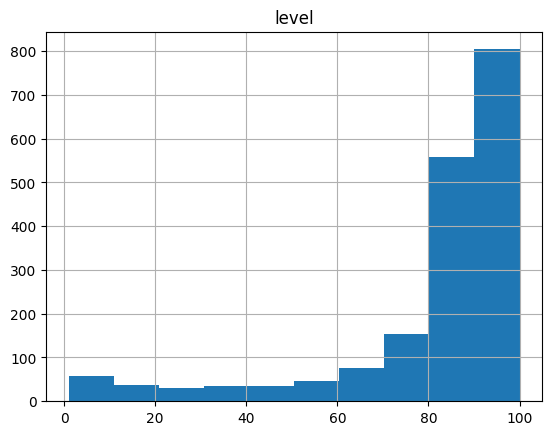

In [29]:
#Number of players that exceed level 69
print("The number of players above level 69 is", 
    str(round(100 * len(teams_data[teams_data['level'] >= 69])/len(teams_data), 2)) + "%")
teams_data.hist(column='level')

We can see that the majority of players (83.92%) are greater than level 69. Why 69? Because that is the baseline zone level of the start of endgame. One thing to note is that player level doesn't necessarily correspond one to one with zone level of endgame progression (player endgame levels can range from 69 to 100, while zone level only goes from 69 to 83*). A level 76 character might not be able to complete a zone of level 76, for example. From anecdotal experience, we can split the endgame character levels into 3 sections: 69-80, 81-90, and 91-100 as those roughly equate to the tiers of difficulty associated with the Atlas (69-79 =  white maps, 80-89 = yellow maps, 90-100 = red maps).

If we plot out just the endgame split, it will look something like below:



*Zones can actually go to 86, but those are unique circumstances that do not necessarily reflect the majority of the content.

Number of people in each category of atlas difficulty: White maps: 148   Yellow maps:  455   Red maps:  930


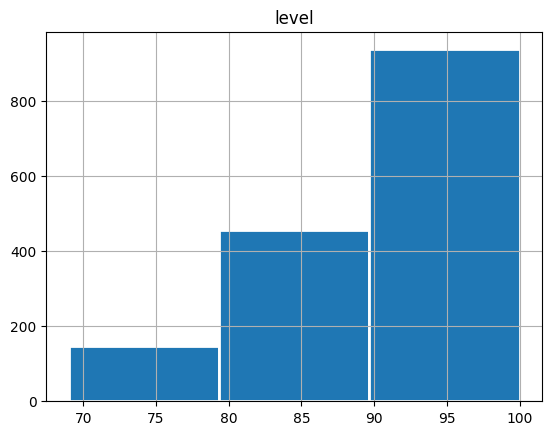

In [52]:
endgame_team_data = teams_data[teams_data['level'] >= 69]
endgame_team_data.hist(column='level', bins=3, edgecolor='white', linewidth=2)

white_maps = teams_data[(teams_data['level'] >= 69) & (teams_data['level'] < 80)]
yellow_maps = teams_data[(teams_data['level'] >= 80) & (teams_data['level'] < 90)]
red_maps = teams_data[(teams_data['level'] >= 90) & (teams_data['level'] < 100)]
print("Number of people in each category of atlas difficulty:", 
      "White maps:", len(white_maps), " ", 
      "Yellow maps: ", len(yellow_maps), " ", 
      "Red maps: ", len(red_maps))

We can see a remarkable amount of people have reached the 90+ threshold. This is where most of the bounties of event occur, so seeing as how roughly 60% of the players who have made it into endgame have engaged with red tiered maps.

We can try mapping levels against allocated atlas passives to see how the distribution is further spread. We know of levels distributions, but does it tie in nicely with atlas completion?

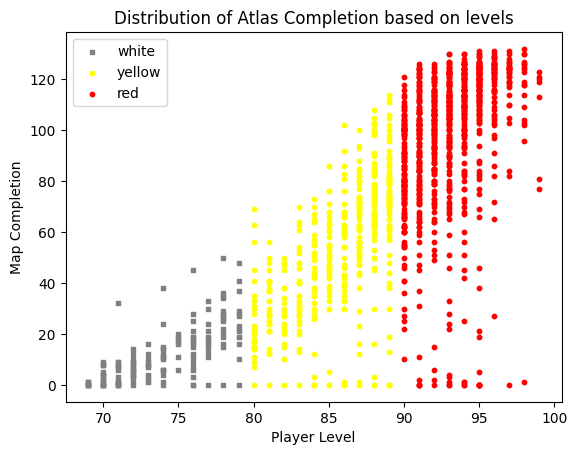

In [58]:
x = range(100)
y = range(0,115)
fig = plt.figure()
ax1 = fig.add_subplot(111)

ax1.scatter(white_maps['level'], white_maps['num_atlas_passives_allocated'], s=10, c='grey', marker="s", label='white')
ax1.scatter(yellow_maps['level'], yellow_maps['num_atlas_passives_allocated'], s=10, c='yellow', marker="o", label='yellow')
ax1.scatter(red_maps['level'], red_maps['num_atlas_passives_allocated'], s=10, c='red', marker="o", label='red')
plt.legend(loc='upper left')
plt.title(label="Distribution of Atlas Completion based on levels")
plt.ylabel("Map Completion")
plt.xlabel("Player Level")
plt.show()

We can see that while the majority of players follow the general trend, there are outlier with players having very little map completion despite reached a certain level. It is true that players can 